In [1]:
!pip install tensorflow 

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [3]:
churn_data  =pd.read_csv("EDA_final.csv")
churn_data.drop(["Unnamed: 0"],axis=1,inplace=True)
churn_data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,Churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4965,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4966,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4967,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [4]:
churn_data.rename(columns = {'area.code':'area_code', 'account.length':'account_length', 'voice.plan':'voice_plan', 'voice.messages':'voice_messages', 'intl.plan':'intl_plan', 'intl.mins':'intl_mins', 'intl.calls':'intl_calls', 'intl.charge':'intl_charge', 'day.mins':'day_mins', 'day.calls':'day_calls', 'day.charge':'day_charge', 'eve.mins':'eve_mins', 'eve.calls':'eve_calls', 'eve.charge':'eve_charge', 'night.mins':'night_mins', 'night.calls':'night_calls', 'night.charge':'night_charge', 'customer.calls':'customer_calls'  }, inplace = True)

### Scaling Down the Data

In [5]:
scaler = MinMaxScaler()
scaled_churn_data = scaler.fit_transform(churn_data)
scaled_df = pd.DataFrame(scaled_churn_data,columns=churn_data.columns)

In [6]:
scaled_df.drop(["state","area_code"],axis=1,inplace=True)
scaled_df

,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,Churn
0,0.524793,1.0,0.480769,0.0,0.500,0.15,0.500000,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.111111,0.0
1,0.438017,1.0,0.500000,0.0,0.685,0.15,0.685185,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.111111,0.0
2,0.561983,0.0,0.000000,0.0,0.610,0.25,0.609259,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.000000,0.0
3,0.342975,0.0,0.000000,1.0,0.330,0.35,0.329630,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.222222,0.0
4,0.305785,0.0,0.000000,1.0,0.505,0.15,0.505556,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,0.202479,1.0,0.769231,0.0,0.495,0.25,0.494444,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.222222,0.0
4965,0.623967,0.0,0.000000,0.0,0.735,0.10,0.735185,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.333333,1.0
4966,0.247934,0.0,0.000000,0.0,0.680,0.20,0.679630,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.111111,0.0
4967,0.446281,0.0,0.000000,0.0,0.425,0.30,0.425926,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.000000,0.0


In [7]:
X = scaled_df.drop("Churn",axis=1)
y = scaled_df[["Churn"]]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

### Balancing the Dataset

In [9]:
y.value_counts()

Churn
0.0      4264
1.0       705
dtype: int64

In [10]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
smote_X,smote_y = smote.fit_resample(X,y)
smote_y.value_counts()

Churn
0.0      4264
1.0      4264
dtype: int64

In [11]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(sampling_strategy="minority")
#X_sm,y_sm = smote.fit_resample(X,y)
#y_sm.value_counts()

Dataset was highly imbalanced so we balanced the data

In [12]:
smote_X.shape

(8528, 17)

In [13]:
smote_X

,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
0,0.524793,1.0,0.480769,0.0,0.500000,0.150000,0.500000,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.111111
1,0.438017,1.0,0.500000,0.0,0.685000,0.150000,0.685185,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.111111
2,0.561983,0.0,0.000000,0.0,0.610000,0.250000,0.609259,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.000000
3,0.342975,0.0,0.000000,1.0,0.330000,0.350000,0.329630,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.222222
4,0.305785,0.0,0.000000,1.0,0.505000,0.150000,0.505556,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.269527,0.0,0.000000,0.0,0.386080,0.250000,0.385855,0.278509,0.650221,0.278452,0.554952,0.707595,0.554996,0.528858,0.656338,0.529135,0.111111
8524,0.306057,0.0,0.000000,0.0,0.422367,0.240125,0.423244,0.861926,0.638834,0.861902,0.525670,0.668726,0.525738,0.595966,0.658719,0.595985,0.000000
8525,0.325250,0.0,0.000000,0.0,0.702745,0.160213,0.702711,0.672950,0.541019,0.672853,0.752601,0.628461,0.752787,0.521612,0.628815,0.521572,0.356029
8526,0.294699,0.0,0.000000,0.0,0.553295,0.250000,0.553525,0.855776,0.596006,0.855745,0.660077,0.559255,0.660089,0.661803,0.707456,0.662160,0.333333


In [14]:
smote_y.shape

(8528, 1)

## Feature Selection 

### CHI2

In [15]:
k = 8

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
selector = SelectKBest(chi2,k = k)

In [18]:
X_new = selector.fit_transform(smote_X,smote_y)

In [19]:
selected_features = smote_X.columns[selector.get_support(indices=True)].tolist()


In [20]:
print(selected_features)

['voice_plan', 'voice_messages', 'intl_plan', 'intl_calls', 'day_mins', 'day_charge', 'eve_charge', 'customer_calls']


In [21]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(smote_X,smote_y)
dfscores = pd.DataFrame(fit.scores_)
dfcloumns = pd.DataFrame(smote_X.columns)
feature_scores = pd.concat([dfcloumns,dfscores],axis=1)
feature_scores.columns=["specs","score"]
feature_scores.sort_values(by="score",ascending=False)

,specs,score
3,intl_plan,606.629183
1,voice_plan,203.892798
2,voice_messages,96.113150
16,customer_calls,71.832735
7,day_mins,29.875445
9,day_charge,29.869951
5,intl_calls,5.941372
12,eve_charge,4.651103
10,eve_mins,4.651060
4,intl_mins,3.076019


### Mutual Information Score

In [22]:
selector_mis = SelectKBest(mutual_info_classif,k=k)

In [23]:
X_new_1 = selector_mis.fit_transform(smote_X,smote_y)

In [24]:
selected_features_1 = smote_X.columns[selector_mis.get_support(indices=True)].tolist()

In [25]:
print(selected_features_1)

['account_length', 'intl_mins', 'intl_calls', 'intl_charge', 'day_calls', 'eve_calls', 'night_calls', 'customer_calls']


In [26]:
mi_score = SelectKBest(score_func=mutual_info_classif,k= k)
fit = mi_score.fit(smote_X,smote_y)
dfscores = pd.DataFrame(fit.scores_)
dfcloumns = pd.DataFrame(smote_X.columns)
feature_scores = pd.concat([dfcloumns,dfscores],axis=1)
feature_scores.columns=["specs","score"]
feature_scores.sort_values(by="score",ascending=False)

,specs,score
8,day_calls,0.393818
14,night_calls,0.393097
11,eve_calls,0.392202
4,intl_mins,0.382984
6,intl_charge,0.380942
0,account_length,0.354638
5,intl_calls,0.304778
16,customer_calls,0.260393
15,night_charge,0.215116
9,day_charge,0.140999


In [27]:
mu_score = SelectKBest(score_func=mutual_info_classif,k=6)
mu_scoree = mu_score.fit(smote_X,smote_y)

In [28]:
mu_scoree.scores_

array([0.35845029, 0.01607875, 0.08287268, 0.03992567, 0.3817561 ,
       0.30019021, 0.37843262, 0.12880749, 0.39577567, 0.1406786 ,
       0.0755296 , 0.39777491, 0.10041115, 0.05717916, 0.39418185,
       0.21107816, 0.25357153])

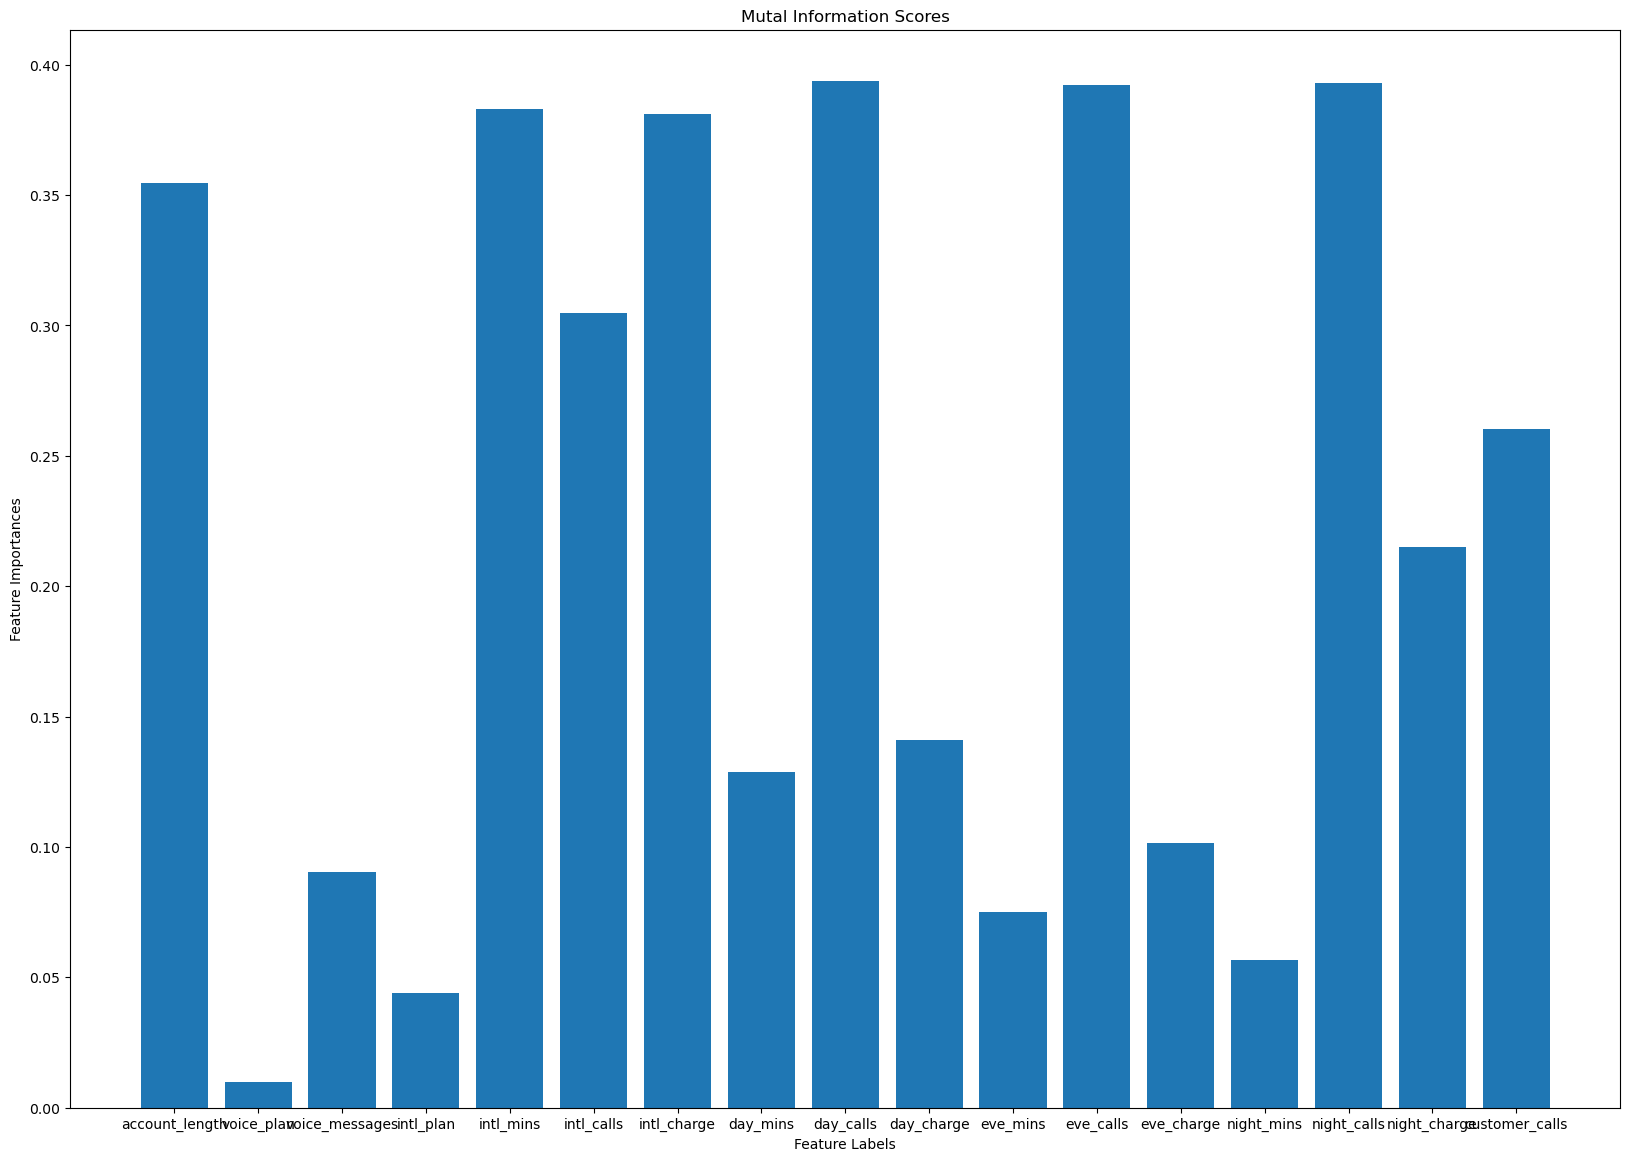

In [29]:
plt.figure(figsize=(20,14))
plt.bar(smote_X.columns,fit.scores_ )
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Mutal Information Scores')
plt.show()

### Feature Importance with Random forest

In [30]:
rf_imp = RandomForestClassifier()

In [31]:
rf_imp.fit(smote_X,smote_y)

RandomForestClassifier()

In [32]:
rf_imp.feature_importances_

array([0.02576031, 0.02036008, 0.02650702, 0.11724585, 0.03351887,
       0.07893139, 0.03551246, 0.11587701, 0.02702316, 0.12413338,
       0.04860412, 0.02446393, 0.05261963, 0.0317182 , 0.02348269,
       0.03157975, 0.18266216])

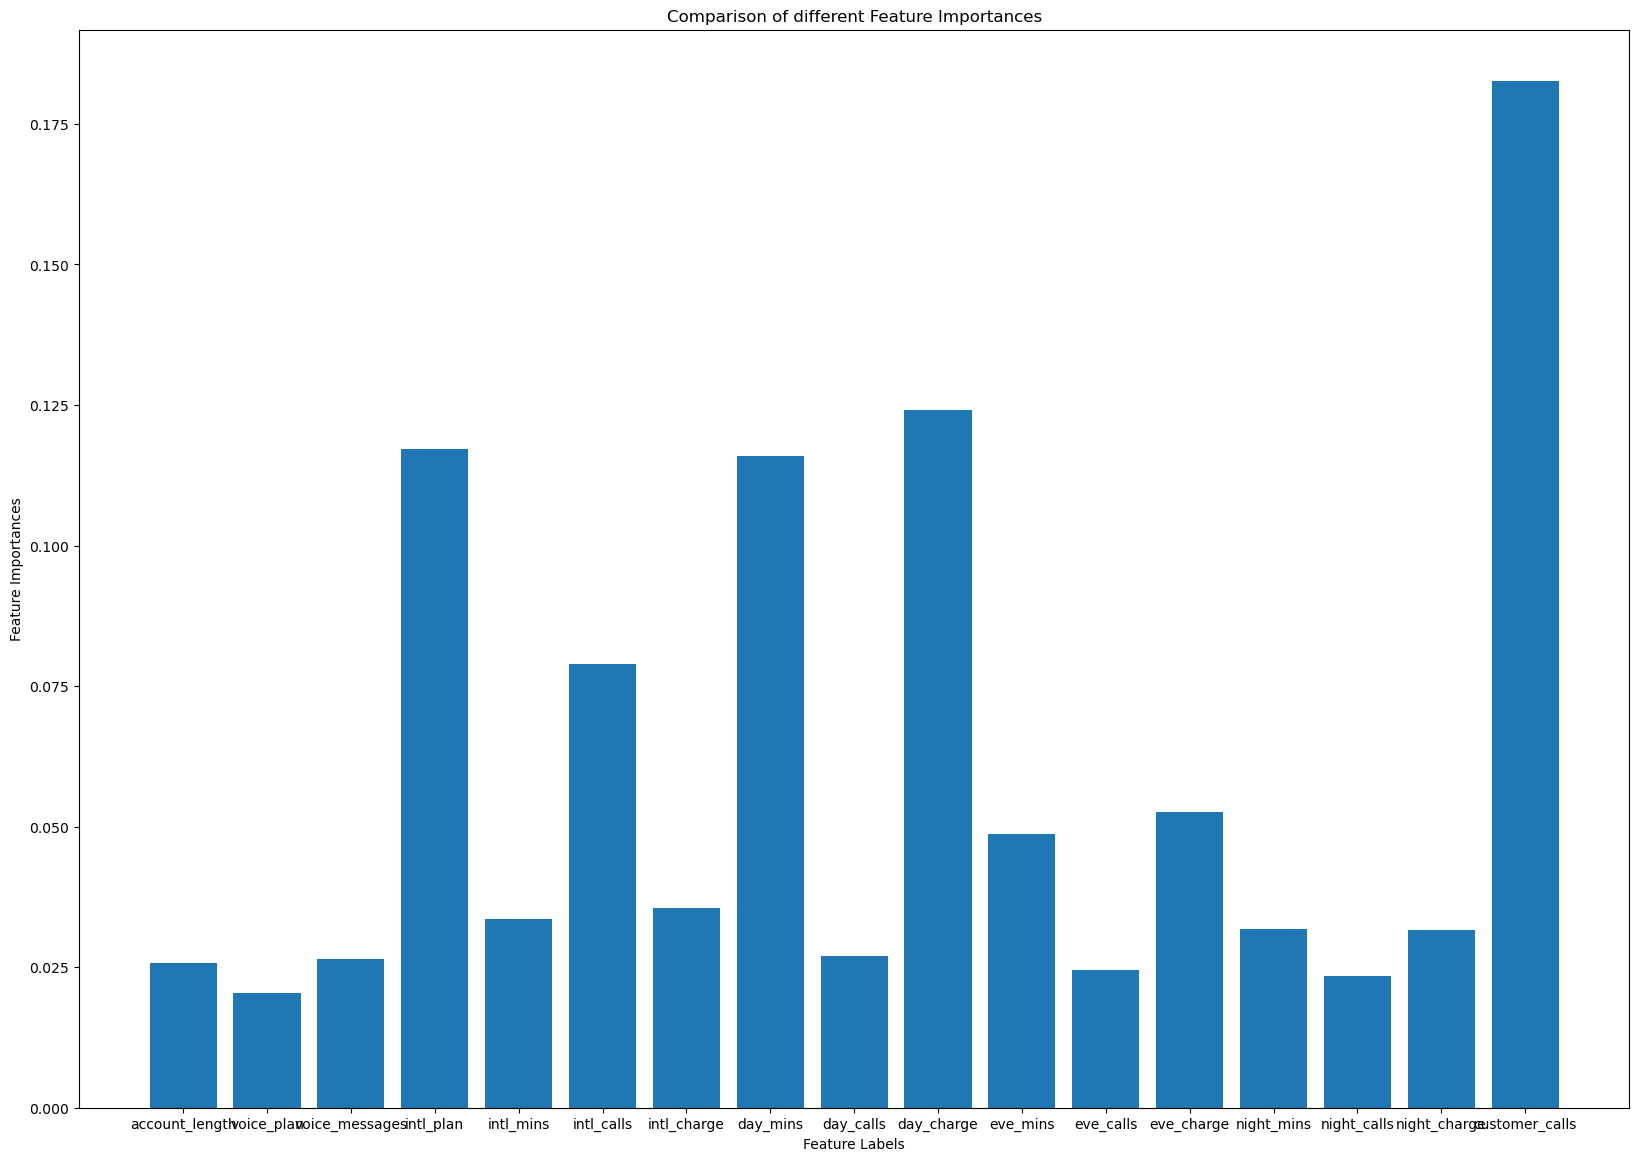

In [33]:
plt.figure(figsize=(20,14))
plt.bar(X.columns,rf_imp.feature_importances_ )
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [34]:
importance_scores = pd.DataFrame({'Feature': X.columns, 'Importance': rf_imp.feature_importances_})
importance_scores = importance_scores.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# print the top 5 most important features
print(importance_scores.head(8))

          Feature  Importance
0  customer_calls    0.182662
1      day_charge    0.124133
2       intl_plan    0.117246
3        day_mins    0.115877
4      intl_calls    0.078931
5      eve_charge    0.052620
6        eve_mins    0.048604
7     intl_charge    0.035512


In [35]:
rf_scores = pd.DataFrame(rf_imp.feature_importances_)
dfcloumns = pd.DataFrame(smote_X.columns)
feature_scores = pd.concat([dfcloumns,rf_scores],axis=1)
feature_scores.columns=["specs","score"]
feature_scores.sort_values(by="score",ascending=False)

,specs,score
16,customer_calls,0.182662
9,day_charge,0.124133
3,intl_plan,0.117246
7,day_mins,0.115877
5,intl_calls,0.078931
12,eve_charge,0.052620
10,eve_mins,0.048604
6,intl_charge,0.035512
4,intl_mins,0.033519
13,night_mins,0.031718


### Feature Importance with Decision tree

In [36]:
dt_imp = DecisionTreeClassifier()

In [37]:
dt_imp.fit(smote_X,smote_y)
dt_imp.feature_importances_

array([0.02778789, 0.03323095, 0.02067425, 0.1638433 , 0.05971433,
       0.03954579, 0.02262798, 0.1866801 , 0.01751691, 0.03721137,
       0.02185066, 0.01263822, 0.07989583, 0.03139893, 0.02370158,
       0.02089848, 0.20078343])

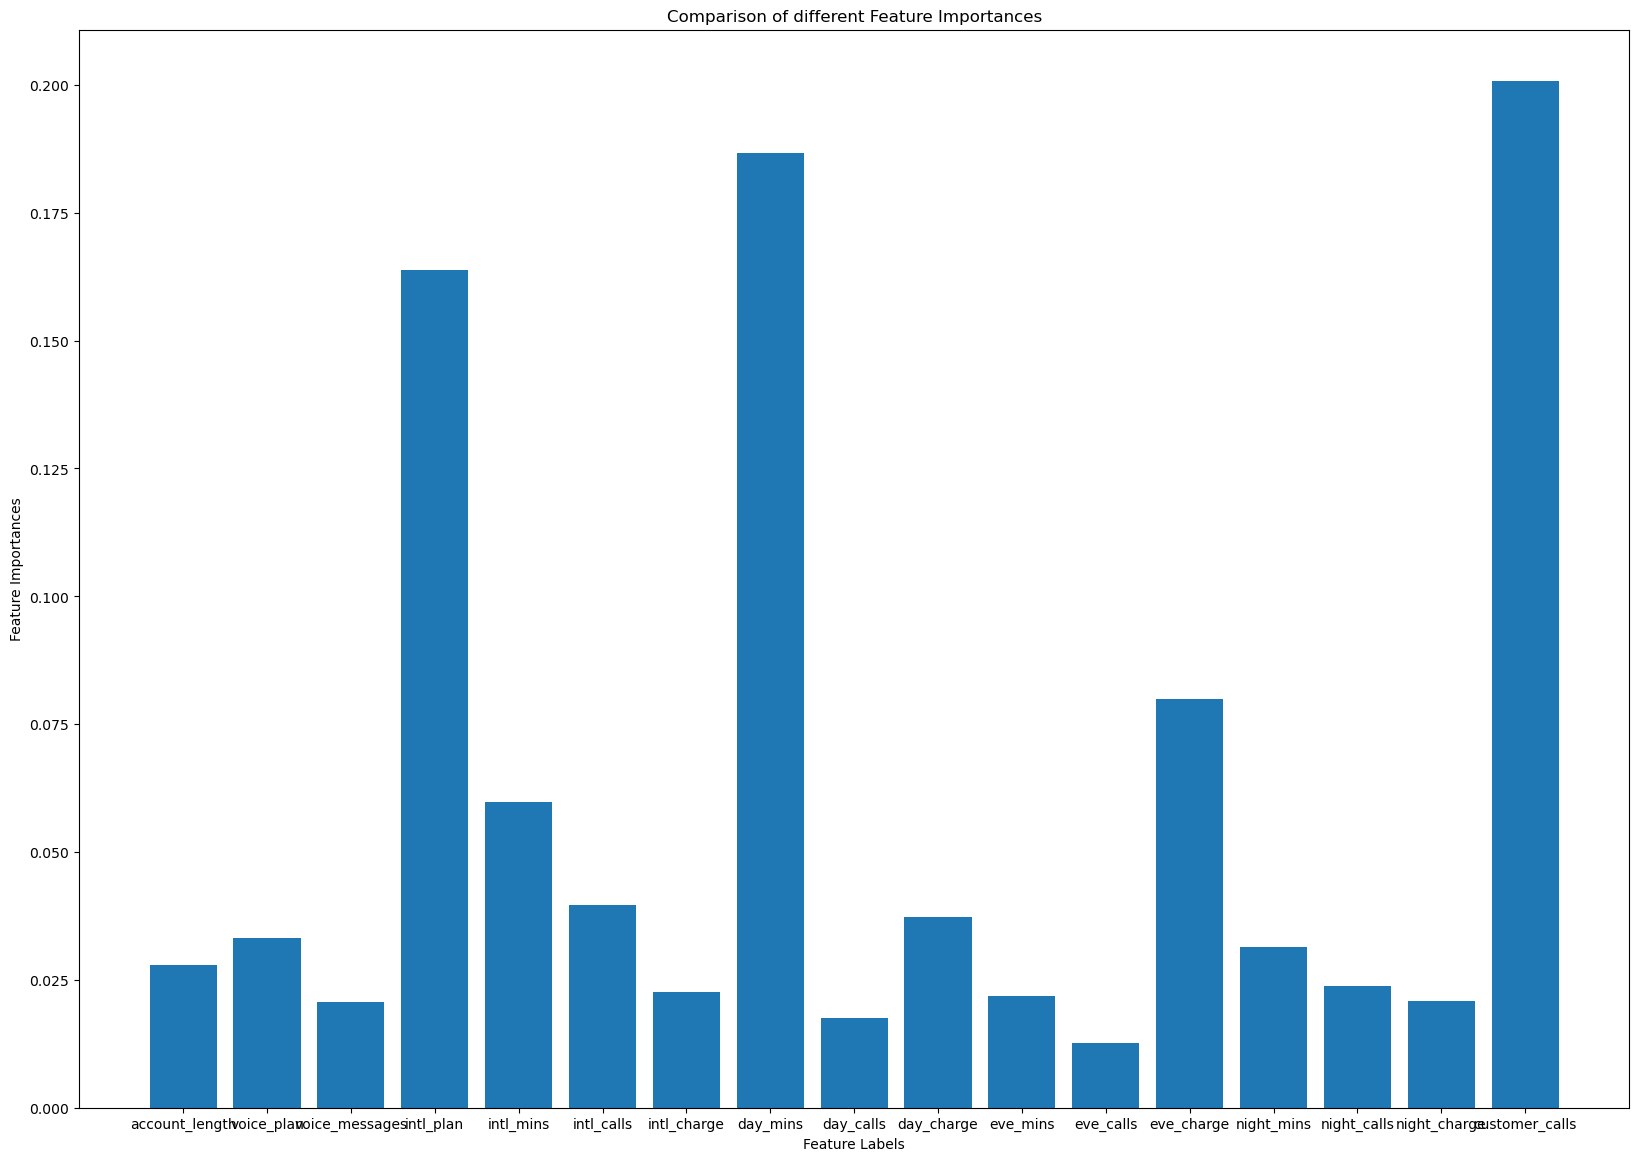

In [38]:
plt.figure(figsize=(20,14))
plt.bar(X.columns,dt_imp.feature_importances_ )
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [39]:
importance_scores = pd.DataFrame({'Feature': X.columns, 'Importance': dt_imp.feature_importances_})
importance_scores = importance_scores.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# print the top 5 most important features
print(importance_scores.head(8))

          Feature  Importance
0  customer_calls    0.200783
1        day_mins    0.186680
2       intl_plan    0.163843
3      eve_charge    0.079896
4       intl_mins    0.059714
5      intl_calls    0.039546
6      day_charge    0.037211
7      voice_plan    0.033231


In [40]:
dt_scores = pd.DataFrame(dt_imp.feature_importances_)
dfcloumns = pd.DataFrame(smote_X.columns)
feature_scores = pd.concat([dfcloumns,dt_scores],axis=1)
feature_scores.columns=["specs","score"]
feature_scores.sort_values(by="score",ascending=False)

,specs,score
16,customer_calls,0.200783
7,day_mins,0.186680
3,intl_plan,0.163843
12,eve_charge,0.079896
4,intl_mins,0.059714
5,intl_calls,0.039546
9,day_charge,0.037211
1,voice_plan,0.033231
13,night_mins,0.031399
0,account_length,0.027788


### Extra Tree Classifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [42]:
etc_model= ExtraTreesClassifier()
etc_model.fit(smote_X,smote_y)
print(etc_model.feature_importances_)

[0.03268521 0.03020295 0.02141976 0.10578682 0.03471115 0.04733878
 0.03542957 0.12889747 0.03253285 0.12041667 0.05168035 0.03107911
 0.05292423 0.03712476 0.03092954 0.03720039 0.1696404 ]


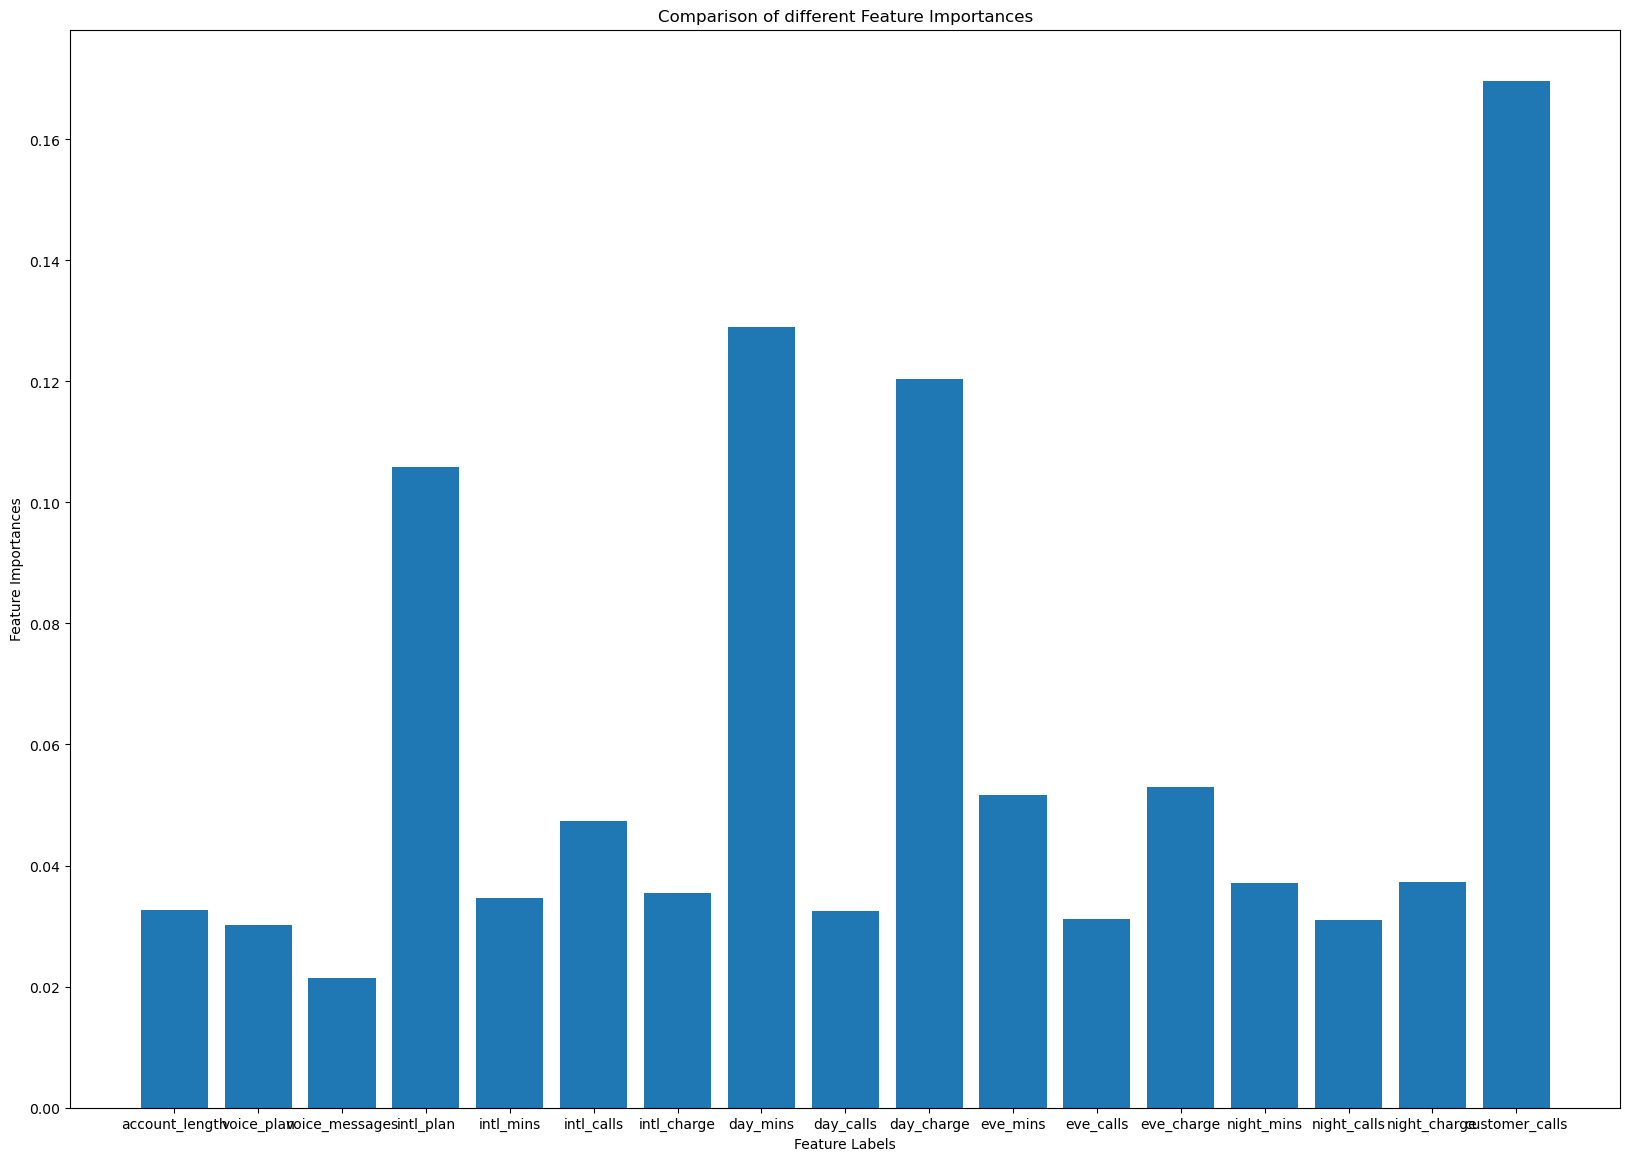

In [43]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(20,14))
plt.bar(X.columns,etc_model.feature_importances_ )
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

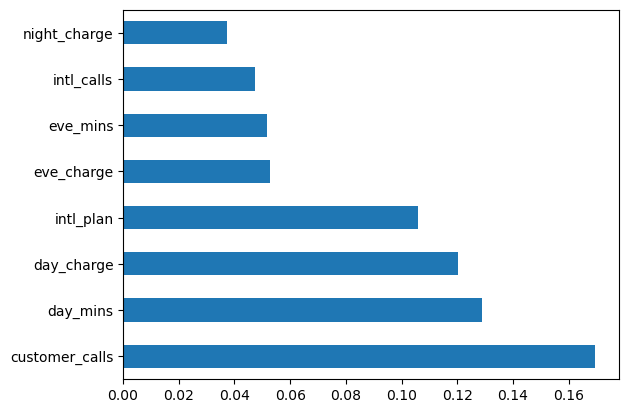

In [44]:
Feature = pd.Series(etc_model.feature_importances_, index = X.columns)
Feature.nlargest(8).plot(kind = 'barh')
plt.show()

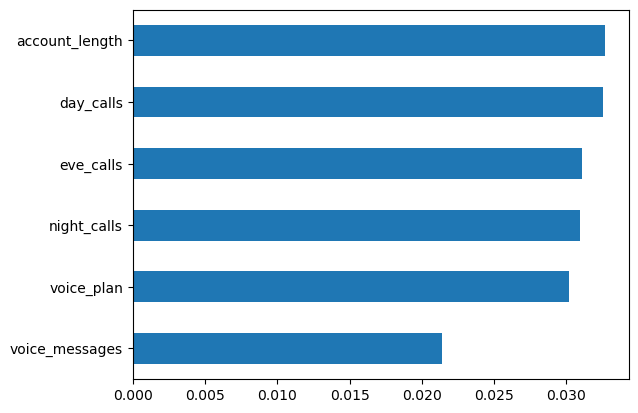

In [45]:
Feature = pd.Series(etc_model.feature_importances_, index = X.columns)
Feature.nsmallest(6).plot(kind = 'barh')
plt.show()

In [46]:
etc_scores = pd.DataFrame(etc_model.feature_importances_)
dfcloumns = pd.DataFrame(smote_X.columns)
feature_scores = pd.concat([dfcloumns,etc_scores],axis=1,sort=True)
feature_scores.columns=["specs","score"]
feature_scores

,specs,score
0,account_length,0.032685
1,voice_plan,0.030203
2,voice_messages,0.021420
3,intl_plan,0.105787
4,intl_mins,0.034711
5,intl_calls,0.047339
6,intl_charge,0.035430
7,day_mins,0.128897
8,day_calls,0.032533
9,day_charge,0.120417


### Recurcive Feature elimination

In [47]:
from sklearn.feature_selection import RFE

In [48]:
rfe_imp = RFE(estimator = LogisticRegression(),n_features_to_select=8,step=1)
rfe_imp.fit(smote_X,smote_y)

RFE(estimator=LogisticRegression(), n_features_to_select=8)

In [49]:
smote_X.columns[rfe_imp.get_support()]

Index(['voice_plan', 'intl_plan', 'intl_mins', 'day_mins', 'day_charge',
       'eve_mins', 'night_mins', 'customer_calls'],
      dtype='object')

In [50]:
fe_churned_X = smote_X[["eve_mins","eve_charge","intl_plan","day_charge","day_mins","customer_calls","voice_plan","voice_messages"]]
fe_churned_y = smote_y
fe_churned_X

,eve_mins,eve_charge,intl_plan,day_charge,day_mins,customer_calls,voice_plan,voice_messages
0,0.542755,0.542866,0.0,0.754183,0.754196,0.111111,1.0,0.480769
1,0.537531,0.537690,0.0,0.459672,0.459744,0.111111,1.0,0.500000
2,0.333242,0.333225,0.0,0.692436,0.692461,0.000000,0.0,0.000000
3,0.170195,0.170171,1.0,0.851740,0.851778,0.222222,0.0,0.000000
4,0.407754,0.407959,1.0,0.474230,0.474253,0.333333,0.0,0.000000
...,...,...,...,...,...,...,...,...
8523,0.554952,0.554996,0.0,0.278452,0.278509,0.111111,0.0,0.000000
8524,0.525670,0.525738,0.0,0.861902,0.861926,0.000000,0.0,0.000000
8525,0.752601,0.752787,0.0,0.672853,0.672950,0.356029,0.0,0.000000
8526,0.660077,0.660089,0.0,0.855745,0.855776,0.333333,0.0,0.000000


In [51]:
fe_churned_y

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8523,1.0
8524,1.0
8525,1.0
8526,1.0


### Modeling

In [52]:
X_train, X_test, y_train, y_test = train_test_split(fe_churned_X,fe_churned_y,test_size=0.20,random_state=12)

In [53]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred = model_logistic.predict(X_test)

In [55]:
acc1 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc1)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       861
         1.0       0.78      0.77      0.77       845

    accuracy                           0.78      1706
   macro avg       0.78      0.78      0.78      1706
weighted avg       0.78      0.78      0.78      1706

Accuracy = 0.7766705744431418


<h2><center> 2.SUPPORT VECTOR CLASSIFIER</center></h2>

In [56]:
clf = SVC()

kernel: 'poly'
parameters ={'kernel':['rbf'],
              'gamma':[50, 5, 0.5, 0.1, 0.01, 0.0001],
               'C':[15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [50, 5, 0.5, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf']})

In [57]:
gsv.best_params_

{'C': 6, 'gamma': 50, 'kernel': 'rbf'}

In [58]:
gsv.best_score_

0.8963628635097015

In [59]:
svc_model = SVC(C = 10, gamma =100, kernel='rbf')
svc_model.fit(X_train , y_train)

SVC(C=10, gamma=100)

In [60]:
y_pred_svc = svc_model.predict(X_test)

In [61]:
acc2 = accuracy_score(y_test,y_pred_svc)
print('Classification Report : \n',classification_report(y_test,y_pred_svc))
print('='*50)
print('Accuracy =',acc2)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       861
         1.0       0.91      0.90      0.90       845

    accuracy                           0.91      1706
   macro avg       0.91      0.90      0.91      1706
weighted avg       0.91      0.91      0.91      1706

Accuracy = 0.9050410316529894


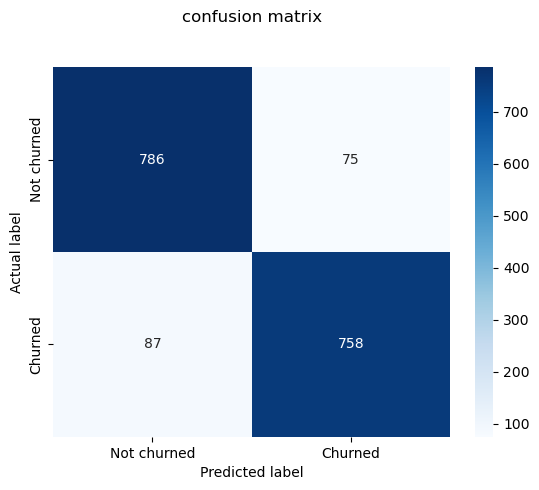

In [62]:
cm = confusion_matrix(y_test,y_pred_svc)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [63]:
svc_model.score(X_train,y_train)

0.9507475813544415

In [64]:
svc_model.score(X_test,y_test)

0.9050410316529894

<h2><center>3. Decision Tree</center></h2>

In [65]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=124)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=124),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [66]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2',
                       random_state=124)

In [67]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9, max_features='auto', random_state=124)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=124)

In [68]:
#Predicting on test data
y_pred_dt = dt_model.predict(X_test) # predicting on test data set 

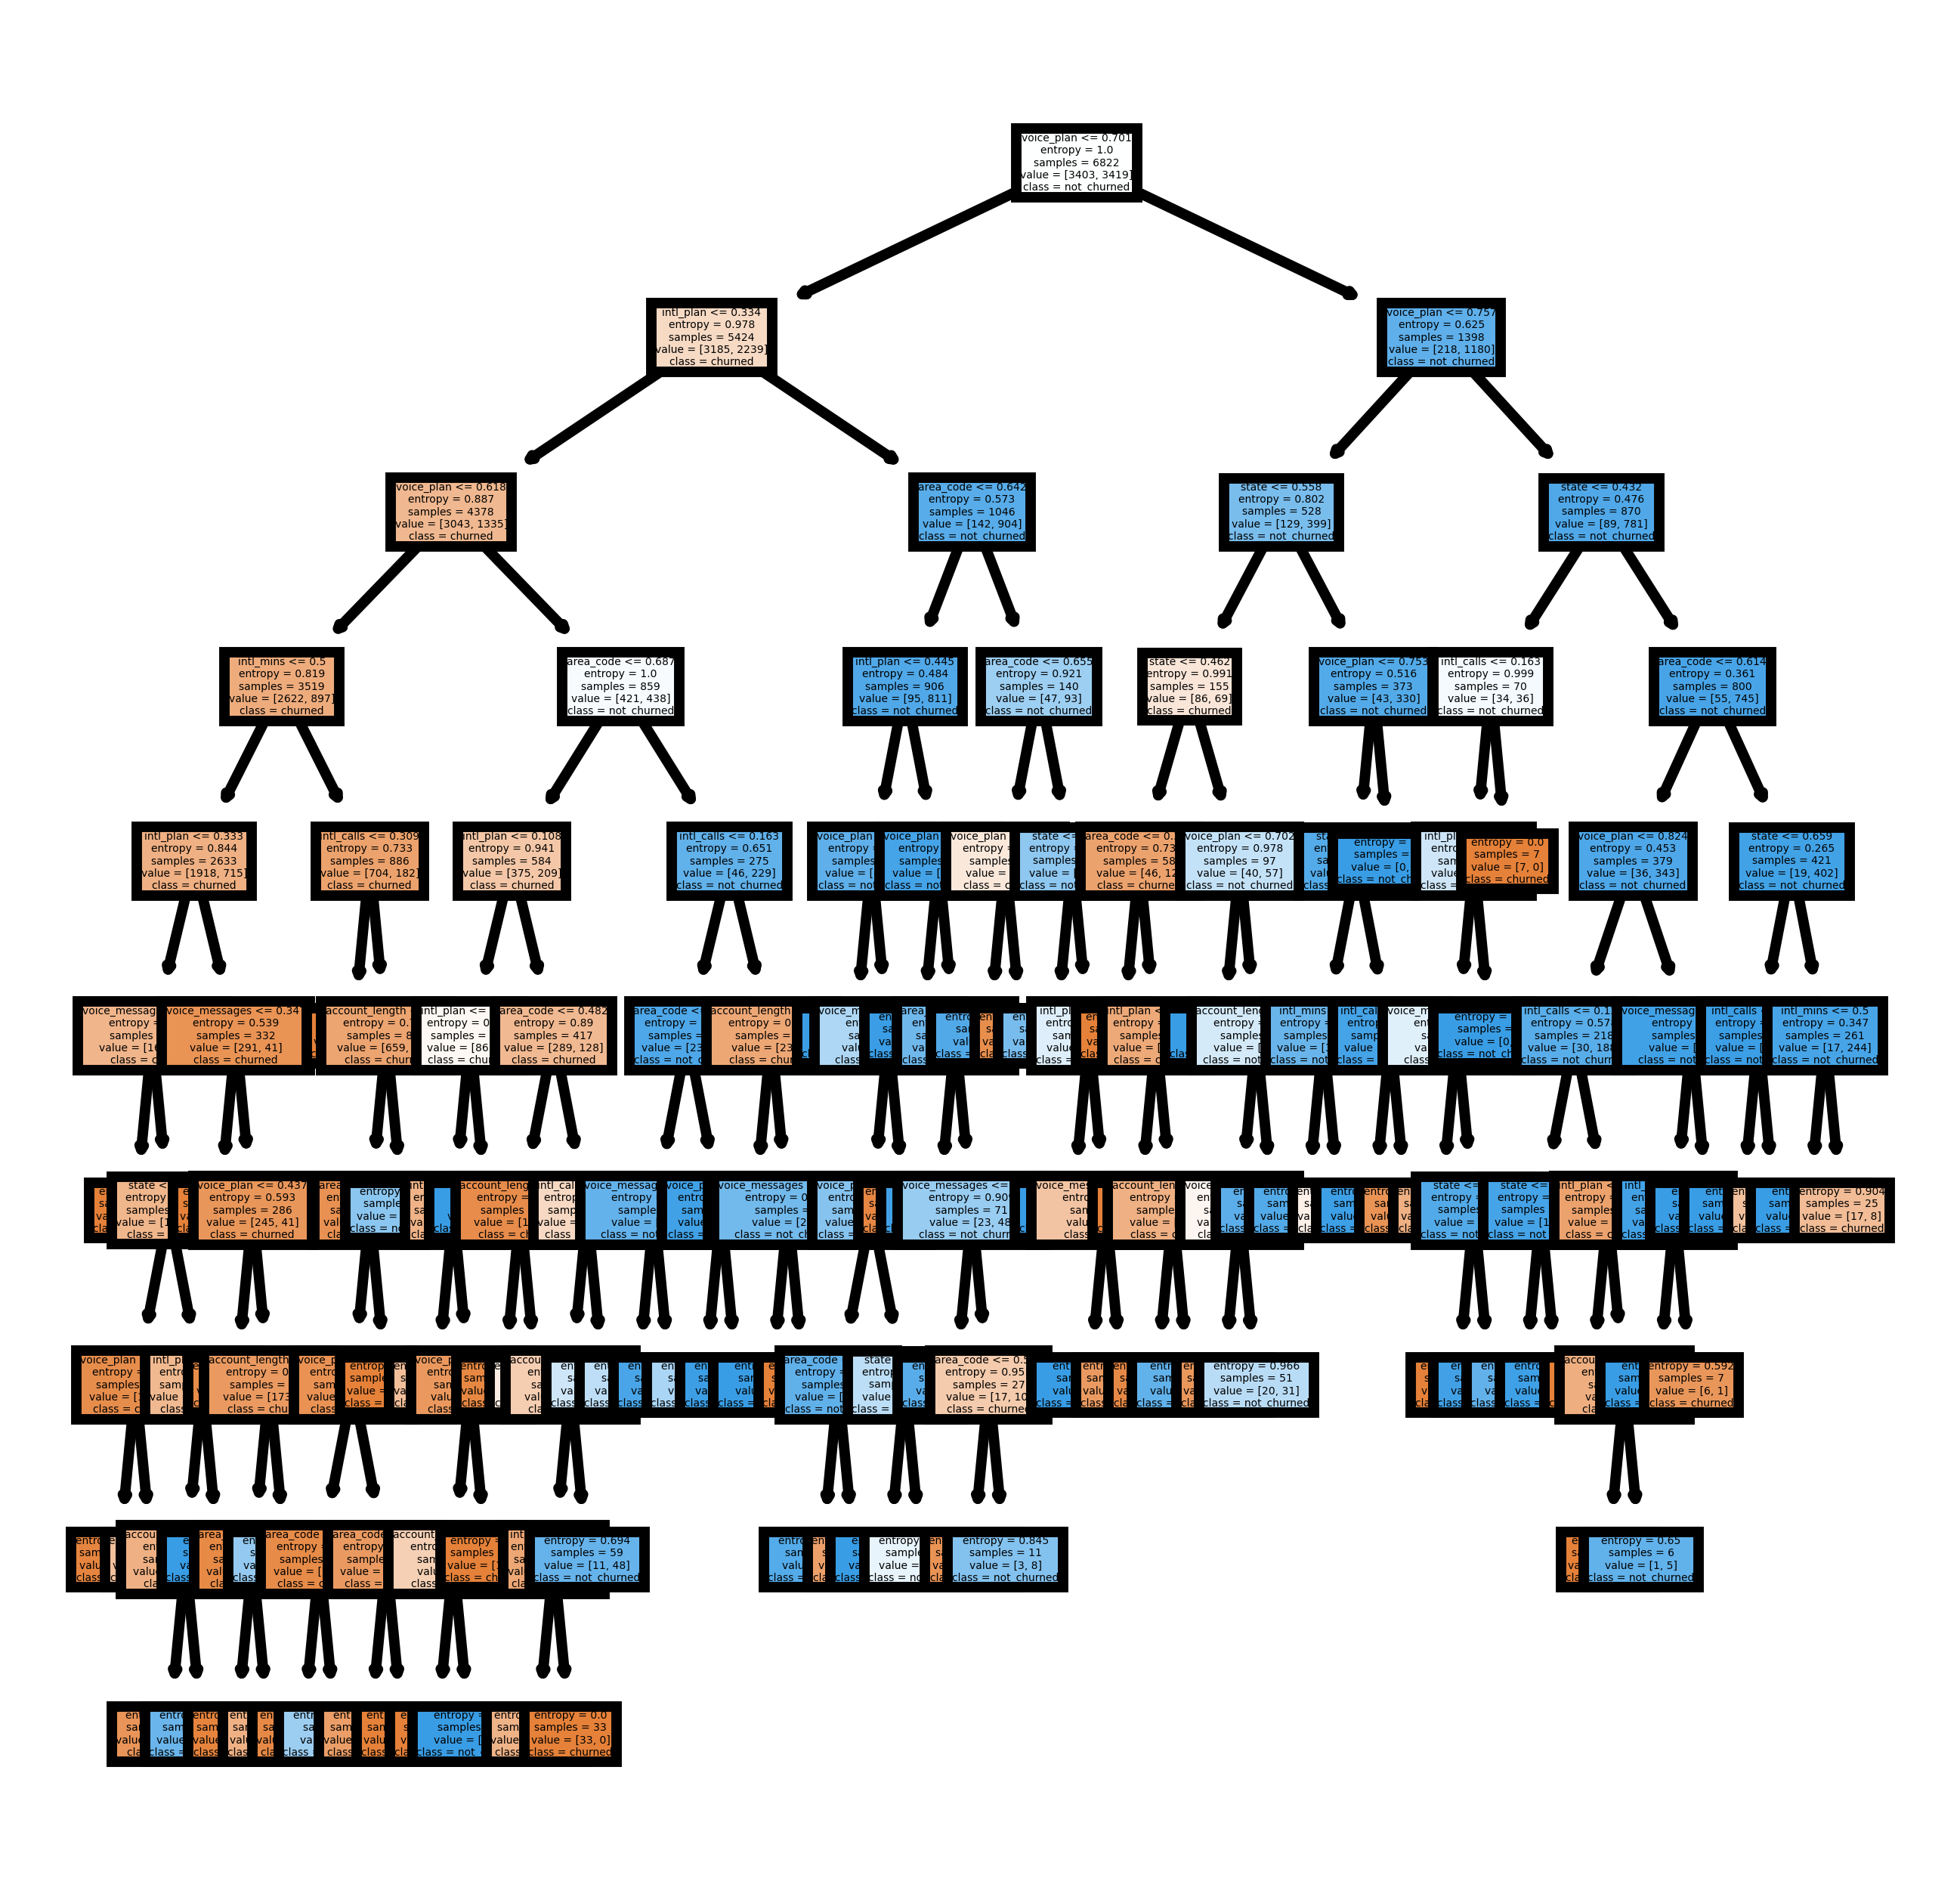

In [69]:
fn=['state','area_code','account_length','voice_plan','voice_messages','intl_plan','intl_mins','intl_calls','intl_charge','day_mins','day_calls','day_charge','eve_mins','eve_calls','eve_charge','night_mins','night_calls','night_charge','customer_calls']
cn=['churned','not_churned']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [70]:
acc3 = accuracy_score(y_test,y_pred_dt)
print('Classification Report : \n',classification_report(y_test,y_pred_dt))
print('='*50)
print('Accuracy =',acc3)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       861
         1.0       0.90      0.85      0.88       845

    accuracy                           0.88      1706
   macro avg       0.88      0.88      0.88      1706
weighted avg       0.88      0.88      0.88      1706

Accuracy = 0.88042203985932


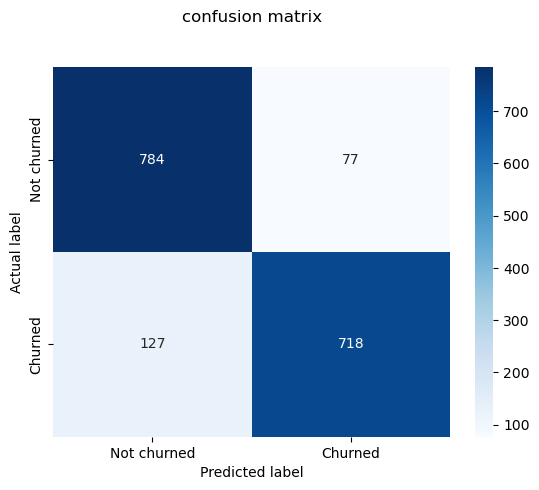

In [71]:
cm = confusion_matrix(y_test,y_pred_dt)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [72]:
dt_model.score(X_train,y_train)

0.8858106127235414

In [73]:
dt_model.score(X_test,y_test)

0.88042203985932

<h2><center> 4.RANDOM FOREST </center></h2>

In [74]:
rfc=RandomForestClassifier(random_state=42)

In [75]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [76]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [77]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [78]:
rfc_model = RandomForestClassifier(n_estimators = 500,max_features="auto" ,max_depth=8 ,criterion = "gini")
rfc_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [79]:
y_pred_rfc = rfc_model.predict(X_test)

In [80]:
acc4 = accuracy_score(y_test,y_pred_rfc)
print("Classification report : \n",classification_report(y_test,y_pred_rfc))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       861
         1.0       0.91      0.87      0.89       845

    accuracy                           0.89      1706
   macro avg       0.89      0.89      0.89      1706
weighted avg       0.89      0.89      0.89      1706

Accuracy Score 0.8921453692848769


Text(0.5, 23.38159722222222, 'Predicted label')

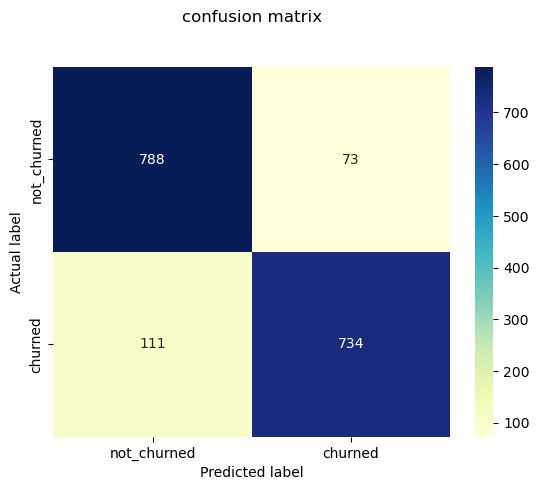

In [81]:
cm = confusion_matrix(y_test,y_pred_rfc)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [82]:
rfc_model.score(X_train,y_train)

0.9044268542949282

In [83]:
rfc_model.score(X_test,y_test)

0.8921453692848769

<h2><center> 5.K-NEAREST NEIGHBOUR </center></h2>

In [84]:
KNN=KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [85]:
# defining parameter range
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [86]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [87]:
grid_search.best_params_

{'n_neighbors': 5}

In [88]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
y_pred_knn = KNN_model.predict(X_test)

In [90]:
acc5 = accuracy_score(y_test,y_pred_knn)
print("Classification report : \n",classification_report(y_test,y_pred_knn))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       861
         1.0       0.88      0.90      0.89       845

    accuracy                           0.89      1706
   macro avg       0.89      0.89      0.89      1706
weighted avg       0.89      0.89      0.89      1706

Accuracy Score 0.8921453692848769


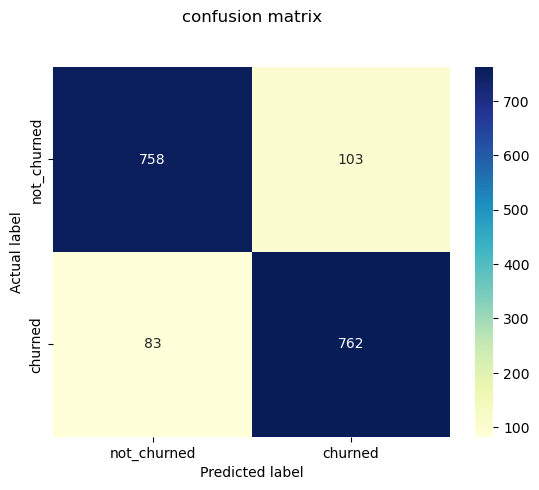

In [91]:
cm = confusion_matrix(y_test,y_pred_knn)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [92]:
KNN_model.score(X_train,y_train)

0.9182058047493403

In [93]:
KNN_model.score(X_test,y_test)

0.8909730363423212

<h2><center> 6.ANN MODEL </center></h2>

In [94]:
# Define the model architecture
ANN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ANN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



# Evaluate the model on the test set
loss, acc6 = ANN_model.evaluate(X_test, y_test)

Epoch 1/100
214/214 [==============================] - 4s 6ms/step - loss: 0.6157 - accuracy: 0.6744 - val_loss: 0.5656 - val_accuracy: 0.7351
Epoch 2/100
214/214 [==============================] - 1s 6ms/step - loss: 0.5364 - accuracy: 0.7697 - val_loss: 0.5009 - val_accuracy: 0.7989
Epoch 3/100
214/214 [==============================] - 1s 5ms/step - loss: 0.4760 - accuracy: 0.8286 - val_loss: 0.4491 - val_accuracy: 0.8499
Epoch 4/100
214/214 [==============================] - 1s 4ms/step - loss: 0.4356 - accuracy: 0.8508 - val_loss: 0.4215 - val_accuracy: 0.8423
Epoch 5/100
214/214 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8577 - val_loss: 0.4035 - val_accuracy: 0.8523
Epoch 6/100
214/214 [==============================] - 1s 4ms/step - loss: 0.4014 - accuracy: 0.8555 - val_loss: 0.3946 - val_accuracy: 0.8669
Epoch 7/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3924 - accuracy: 0.8587 - val_loss: 0.3870 - val_accuracy: 0.8605

Epoch 58/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3364 - accuracy: 0.8719 - val_loss: 0.3303 - val_accuracy: 0.8757
Epoch 59/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3367 - accuracy: 0.8703 - val_loss: 0.3354 - val_accuracy: 0.8769
Epoch 60/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3355 - accuracy: 0.8722 - val_loss: 0.3326 - val_accuracy: 0.8734
Epoch 61/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8698 - val_loss: 0.3333 - val_accuracy: 0.8716
Epoch 62/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3365 - accuracy: 0.8691 - val_loss: 0.3333 - val_accuracy: 0.8716
Epoch 63/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8707 - val_loss: 0.3331 - val_accuracy: 0.8705
Epoch 64/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3338 - accuracy: 0.8713 - val_loss: 0.3369 - val_accuracy:

In [95]:
print("Test Accuracy",acc6)

Test Accuracy 0.8751465678215027


## ENSEMBLE TECHNIQUE

In [96]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_model = LogisticRegression(random_state=42)
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [97]:
from sklearn.metrics import f1_score
rf_pred = rf_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Logistic Regression Accuracy:", logreg_acc)
print("Logistic Regression F1 Score:", logreg_f1)

Random Forest Accuracy: 0.9079718640093787
Random Forest F1 Score: 0.9057057057057057
Logistic Regression Accuracy: 0.7766705744431418
Logistic Regression F1 Score: 0.7730792138177486


In [98]:
ensemble_pred = np.round((rf_pred + logreg_pred)/2)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

print("Ensemble Accuracy:", ensemble_acc)
print("Ensemble F1 Score:", ensemble_f1)

Ensemble Accuracy: 0.8364595545134819
Ensemble F1 Score: 0.8163265306122448


<h2><center> 1. ADA BOOST </center></h2>

In [99]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [100]:
seed = 10
num_trees = 30

In [101]:
kfold = KFold(n_splits=5)
ada_model = AdaBoostClassifier(n_estimators=num_trees)
ada_results = cross_val_score(ada_model,fe_churned_X,fe_churned_y,cv=kfold)
print(ada_results.mean())

0.8177683043802622


<h2><center> 2. XG BOOST </center></h2>

In [102]:
!pip install xgboost

In [103]:
from sklearn import svm
from xgboost import XGBClassifier

In [104]:
clf = XGBClassifier()

In [105]:
kfold = KFold(n_splits=5)
xg_model = XGBClassifier(n_estimators = num_trees)
xg_results = cross_val_score(xg_model,fe_churned_X,fe_churned_y,cv=kfold)
print(xg_results.mean())

0.9115884939475304


<h2><center> 3. Stacking </center></h2>

In [106]:
!pip install mlxtend

In [107]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [108]:
clf1=KNeighborsClassifier(n_neighbors=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
lr=LogisticRegression()
sclf=StackingClassifier(classifiers=[clf1,clf2,clf3],use_probas=True,meta_classifier=lr)

In [109]:
print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Random_forest','Naive_bayes','StackingClassifier']):
    scores=cross_val_score(clf,fe_churned_X,fe_churned_y,cv=3,scoring='f1_macro')
    print("f1 Scores:",(scores.mean(),label))

3-fold cross validation:

f1 Scores: (0.8894909807332049, 'KNN')
f1 Scores: (0.9061790463960578, 'Random_forest')
f1 Scores: (0.8121348790368451, 'Naive_bayes')
f1 Scores: (0.8894909807332049, 'StackingClassifier')


In [110]:
scores.mean()

0.8894909807332049

<h2><center> 4. BAGGING </center></h2>

In [111]:
from sklearn.ensemble import BaggingClassifier

In [112]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,max_features=5,random_state=42)

In [113]:
bagg_scores = bagging_clf.fit(X_train,y_train).score(X_test,y_test)
bagg_scores

0.9185228604923799

### Finding the best model

In [114]:
data = {"MODEL":pd.Series(["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","KNN","ANN","Ensemble","Ada Boost","XG Boost","Satcking","Bagging"]),"Accuracy":pd.Series([acc1,acc2,acc3,acc4,acc5,acc6,ensemble_acc,ada_results.mean(),xg_results.mean(),scores.mean(),bagg_scores])}
Accuracy_table=pd.DataFrame(data)
Accuracy_table.sort_values(by='Accuracy')

,MODEL,Accuracy
0,Logistic Regression,0.776671
7,Ada Boost,0.817768
6,Ensemble,0.836460
5,ANN,0.875147
2,Decision Tree,0.880422
9,Satcking,0.889491
4,KNN,0.890973
3,Random Forest,0.892145
1,Support Vector Machine,0.905041
8,XG Boost,0.911588


## Create a pickle file 

In [115]:
import pickle
pickle_out = open("bagging_clf.pkl","wb")
pickle.dump(bagging_clf,pickle_out)
pickle_out.close()

In [116]:
import numpy as np


In [117]:
bagging_clf.predict([[1.0,0.480769,0.0,0.15,0.754196,0.754183,0.542755,0.111111]])

array([0.])

In [118]:
bagging_clf.predict([[0.0,0.000000,0.0,0.10,0.524040,0.523929,0.706076,0.333333]])

array([1.])